<a href="https://colab.research.google.com/github/DoLamMinhKhoi/Data-Analytics-and-Visualization-with-Python/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THÀNH VIÊN NHÓM:<br>
*   Đỗ Lâm Minh Khôi<br>
*   Đặng Thị Diễm Quỳnh<br>

Topic: Spotify

Kết nối với Drive và đọc file csv:

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/gdrive/MyDrive/THI ĐỒ ÁN/PYTHON /spotify-2023.csv", encoding = 'ISO-8859-1')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Xử lý, làm sạch dữ liệu:

In [ ]:
#
# After checking info of this data, we found out these columns are in
# wrong format: "in_deezer_playlists", "streams" and "in_shazam_charts".
# We need to change from object to int64.
#

# Handling values like 1,327:
df["in_deezer_playlists"] = df["in_deezer_playlists"].str.replace(',','')
df["in_shazam_charts"] = df["in_shazam_charts"].str.replace(',','')

df["in_deezer_playlists"] = pd.to_numeric(df["in_deezer_playlists"], errors = "coerce").convert_dtypes()
df["streams"] = pd.to_numeric(df["streams"], errors = "coerce").convert_dtypes()
df["in_shazam_charts"] = pd.to_numeric(df["in_shazam_charts"], errors = "coerce").convert_dtypes()

#
# Them, "in_shazam_charts" column needs to be worked with null values.
# Therefore, we fill out null values with 0, means no ranking in shazam chart
# Finally, we drop all nan values left, except in key column
#

df["in_shazam_charts"].fillna(0, inplace=True)
df = df.dropna(subset=["streams"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    Int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    Int64 
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      952 non-null    Int64 
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

In [ ]:
#Take another variable to set for streaming rank:
df_streams = df.sort_values(by="streams", ascending=False)
df_streams.reset_index(drop=True, inplace=True) #Restart counting the ordering number
df_streams.rename_axis("Ranking",inplace=True)
df_streams.reset_index(inplace=True)
df_streams

,Ranking,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,...,171,C#,Major,50,38,80,0,0,9,7
1,1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,...,96,C#,Minor,83,93,65,58,0,9,8
2,2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,...,110,C#,Major,50,45,41,75,0,11,3
3,3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,...,98,F#,Minor,82,54,59,69,0,18,10
4,4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,...,90,D,Major,76,91,50,54,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,947,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,...,140,C#,Major,56,48,73,0,0,35,4
948,948,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,...,133,B,Minor,93,68,65,42,0,12,25
949,949,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,...,97,NaN,Major,79,92,89,5,0,6,5
950,950,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,...,105,G,Major,82,62,74,10,0,33,7


Số bài hát được phát hành trong các năm:

In [ ]:
df_years = df.groupby("released_year").size().reset_index()
df_years.rename(columns = {0: "track_count"}, inplace=True)

df_years

,released_year,track_count
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1


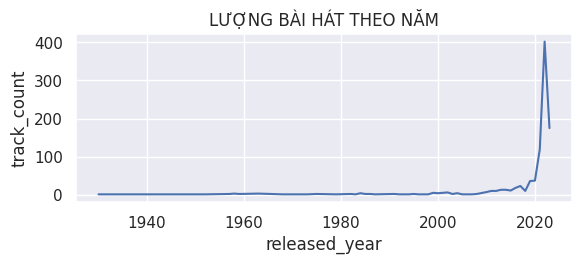

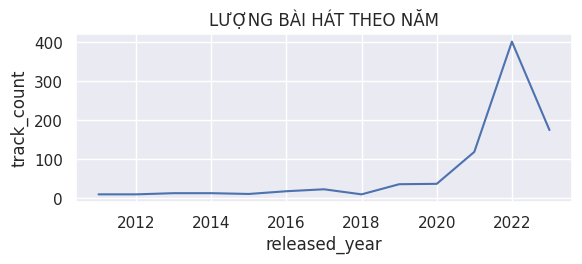

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Using line chart to draw
plt.subplot(2, 1, 1)
sns.lineplot(
    data = df_years,
    x = "released_year", y = "track_count"
)

plt.title("LƯỢNG BÀI HÁT THEO NĂM")
plt.show()

# Compare to 2011 - now:*
df_years = df_years[df_years["released_year"] > 2010]
plt.subplot(2, 1, 2)
sns.lineplot(
    data = df_years,
    x = "released_year", y = "track_count"
)

plt.title("LƯỢNG BÀI HÁT THEO NĂM")
plt.show()

Top 10 bài hát có nhiều lượt stream nhất Spotify:

In [ ]:
df_stream = df_streams[["track_name", "artist(s)_name", "streams", "released_year"]]

df_stream_10 = df_stream.head(10)
df_stream_10

,track_name,artist(s)_name,streams,released_year
0,Blinding Lights,The Weeknd,3703895074,2019
1,Shape of You,Ed Sheeran,3562543890,2017
2,Someone You Loved,Lewis Capaldi,2887241814,2018
3,Dance Monkey,Tones and I,2864791672,2019
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550,2018
5,One Dance,"Drake, WizKid, Kyla",2713922350,2016
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922,2021
7,Believer,Imagine Dragons,2594040133,2017
8,Closer,"The Chainsmokers, Halsey",2591224264,2016
9,Starboy,"The Weeknd, Daft Punk",2565529693,2016


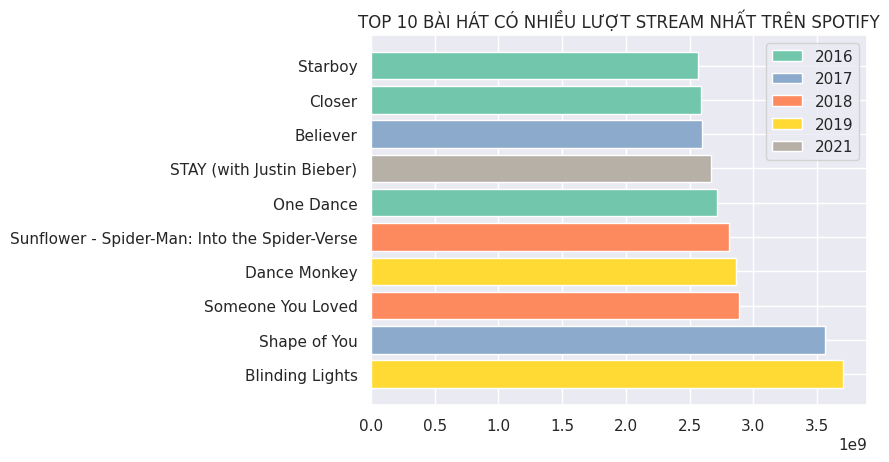

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

legend_years = set(df_stream_10["released_year"])

year_to_color = {
    2016: "#71c6ac",
    2017: "#8caacb",
    2018: "#fc8a5e",
    2019: "#ffda34",
    2021: "#b6b0a7"
}

#Line bar chart (horizontally)
sns.set_theme()
plt.barh(
    data = df_stream_10,
    y = "track_name", width="streams",
    color=df_stream_10['released_year'].map(year_to_color)
)

# Set the legends to color for each released_year
legend_handles = [Patch(facecolor=year_to_color[year], label=str(year)) for year in legend_years]
plt.legend(handles=legend_handles)

plt.title("TOP 10 BÀI HÁT CÓ NHIỀU LƯỢT STREAM NHẤT TRÊN SPOTIFY")
plt.show()

Top 25, top 50:

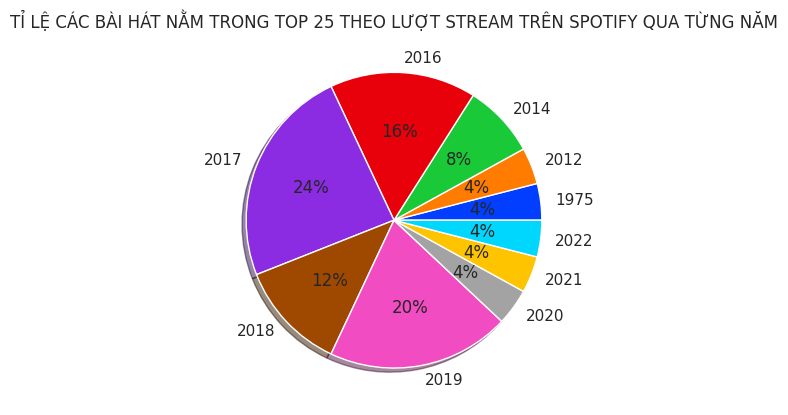

In [ ]:
#Top 25:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette = "bright")

df_stream_25 = df_stream.head(25)
df_stream_25 = df_stream_25.groupby("released_year").size().reset_index()
df_stream_25 = df_stream_25.rename(columns = {0: "songs_number"})

df_stream_25

plt.pie(df_stream_25["songs_number"], labels = df_stream_25["released_year"], shadow=True, autopct='%.0f%%')
plt.title("TỈ LỆ CÁC BÀI HÁT NẰM TRONG TOP 25 THEO LƯỢT STREAM TRÊN SPOTIFY QUA TỪNG NĂM")
plt.show()

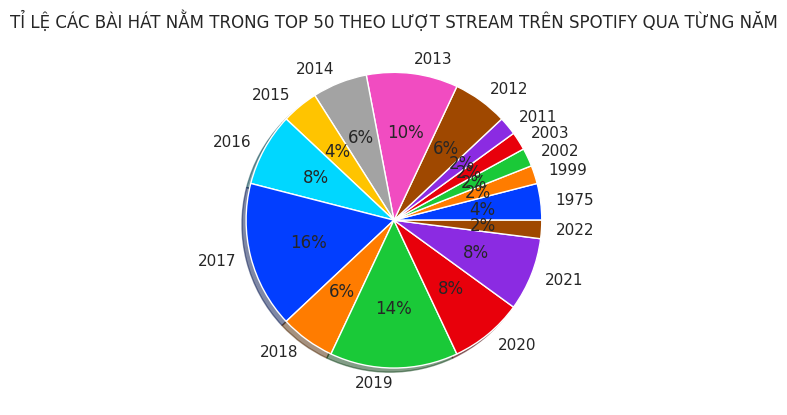

In [ ]:
#Top 50:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette = "bright")

df_stream_50 = df_stream.head(50)
df_stream_50 = df_stream_50.groupby("released_year").size().reset_index()
df_stream_50 = df_stream_50.rename(columns = {0: "songs_number"})

df_stream_50

plt.pie(df_stream_50["songs_number"], labels = df_stream_50["released_year"], shadow=True, autopct='%.0f%%')
plt.title("TỈ LỆ CÁC BÀI HÁT NẰM TRONG TOP 50 THEO LƯỢT STREAM TRÊN SPOTIFY QUA TỪNG NĂM")
plt.show()

Trong năm 2013, bài nào có số lượt phát nhiều nhất trên nền tảng Spotify?

In [ ]:
df_2013 = df_streams[df_streams["released_year"] == 2013]

df_2013

,Ranking,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
25,25,Take Me To Church,Hozier,1,2013,9,13,23804,31,2135158446,...,129,E,Minor,57,41,66,63,0,12,5
28,28,All of Me,John Legend,1,2013,8,1,27221,0,2086124197,...,120,G#,Major,42,33,26,92,0,13,3
29,29,Counting Stars,OneRepublic,1,2013,1,1,29215,43,2011464183,...,122,C#,Minor,66,48,71,6,0,12,4
31,31,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,...,124,D,Major,53,66,78,0,0,16,5
45,45,Do I Wanna Know?,Arctic Monkeys,1,2013,1,1,33783,26,1788326445,...,85,F,Major,55,42,53,17,0,22,3
97,97,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,...,135,NaN,Minor,48,44,42,12,2,11,3
101,101,Why'd You Only Call Me When You're High?,Arctic Monkeys,1,2013,1,1,23389,29,1267333350,...,92,D,Major,70,81,63,4,0,8,4
162,162,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,...,116,F#,Minor,79,87,81,4,0,10,4
185,185,Santa Tell Me,Ariana Grande,1,2013,12,13,9408,0,834129063,...,133,G,Major,46,53,63,5,0,30,18
224,224,Bound 2,Kanye West,1,2013,1,1,19806,7,703301727,...,149,C#,Major,37,28,66,14,0,9,5


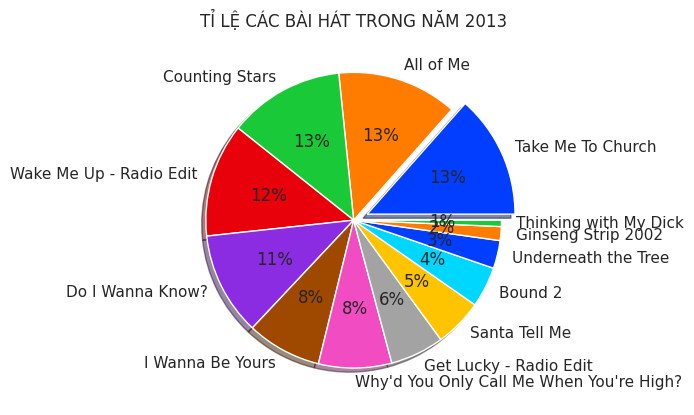

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette = "bright")

df_2013 = df_2013[["track_name", "streams"]]

# Using pie chart to draw
explode = [0 for i in range(len(df_2013))]
explode[0] = 0.1

plt.pie(df_2013["streams"], labels = df_2013["track_name"], explode=explode, shadow=True, autopct='%.0f%%')
plt.title("TỈ LỆ CÁC BÀI HÁT TRONG NĂM 2013")
plt.show()

Liệt kê những bài hát solo trong năm 2013

In [ ]:
# Filter all solo songs released in 2013:
filtered_artist_solo = df[df['artist_count'] == 1]
filtered_artist_solo = filtered_artist_solo[filtered_artist_solo['released_year'] == 2013]
filtered_artist_solo

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,135,NaN,Minor,48,44,42,12,2,11,3
157,Counting Stars,OneRepublic,1,2013,1,1,29215,43,2011464183,179,...,122,C#,Minor,66,48,71,6,0,12,4
172,Do I Wanna Know?,Arctic Monkeys,1,2013,1,1,33783,26,1788326445,133,...,85,F,Major,55,42,53,17,0,22,3
177,Why'd You Only Call Me When You're High?,Arctic Monkeys,1,2013,1,1,23389,29,1267333350,54,...,92,D,Major,70,81,63,4,0,8,4
189,Take Me To Church,Hozier,1,2013,9,13,23804,31,2135158446,187,...,129,E,Minor,57,41,66,63,0,12,5
446,Santa Tell Me,Ariana Grande,1,2013,12,13,9408,0,834129063,231,...,133,G,Major,46,53,63,5,0,30,18
450,Underneath the Tree,Kelly Clarkson,1,2013,10,25,6596,0,485285717,144,...,160,G#,Major,51,69,81,0,0,21,5
623,All of Me,John Legend,1,2013,8,1,27221,0,2086124197,308,...,120,G#,Major,42,33,26,92,0,13,3
660,Ginseng Strip 2002,Yung Lean,1,2013,8,16,4310,0,240769997,13,...,115,C#,Major,60,37,71,8,0,48,4
720,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,...,124,D,Major,53,66,78,0,0,16,5


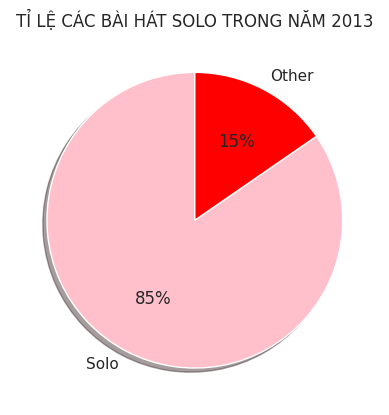

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
# Filter 1-singer songs:
data = filtered_artist_solo

# Counting solo songs and others:
solo_count = len(filtered_artist_solo)
other_artist_count = len(df[df['released_year'] == 2013]) - solo_count

# Create data and label:
sizes = [solo_count, other_artist_count]
labels = ['Solo', 'Other']
colors = ['pink', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%.0f%%', startangle=90, shadow=True)
plt.title('TỈ LỆ CÁC BÀI HÁT SOLO TRONG NĂM 2013')
plt.show()

Số lượng bài hát từng ca sĩ đóng góp cho Spotify.<br>
Vẽ biểu đồ Top10. <br>
(Các bài hát có cùng ca sĩ thì mỗi ca sĩ sẽ được tính 1 bài.)

In [ ]:
# Splitting all the songs of more than 1 artist:
df_each_artist = df[["track_name", "artist(s)_name"]]
df_each_artist['artist(s)_name'] = df_each_artist['artist(s)_name'].str.split(', ')
df_each_artist = df_each_artist.explode("artist(s)_name")

df_each_artist

<ipython-input-16-ef3d47f65db8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_each_artist['artist(s)_name'] = df_each_artist['artist(s)_name'].str.split(', ')


,track_name,artist(s)_name
0,Seven (feat. Latto) (Explicit Ver.),Latto
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook
1,LALA,Myke Towers
2,vampire,Olivia Rodrigo
3,Cruel Summer,Taylor Swift
...,...,...
950,A Veces (feat. Feid),Paulo Londra
951,En La De Ella,Feid
951,En La De Ella,Sech
951,En La De Ella,Jhayco


In [ ]:
singers_songs = df_each_artist.groupby("artist(s)_name").count().reset_index()
singers_songs = singers_songs.sort_values("track_name", ascending=False)

singers_songs.rename(columns={"track_name": "track_count"}, inplace=True)
singers_songs

,artist(s)_name,track_count
67,Bad Bunny,40
608,Taylor Swift,38
628,The Weeknd,37
319,Kendrick Lamar,23
544,SZA,23
...,...,...
267,Jain,1
265,Jack Black,1
263,JISOO,1
258,Interplanetary Criminal,1


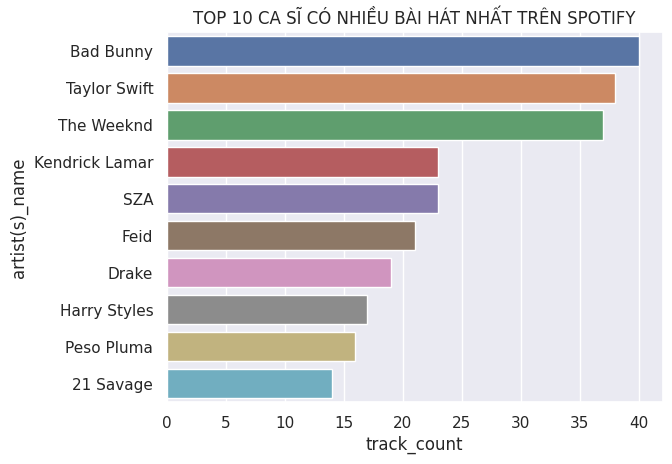

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

singers_songs = singers_songs.head(10)

sns.set_theme()
sns.barplot(
    data = singers_songs,
    x = "track_count", y = "artist(s)_name"
)
plt.title("TOP 10 CA SĨ CÓ NHIỀU BÀI HÁT NHẤT TRÊN SPOTIFY")
plt.show()

Xếp hạng của top 10 những bài hát có lượng âm thanh Acoustic nhiều nhất theo lượt stream:

In [ ]:
top_acoustic = df_streams.nlargest(10, "acousticness_%") #Already sorted to acouticnes_%
top_acoustic_stream = top_acoustic[["track_name", "artist(s)_name", "Ranking", "acousticness_%"]]
top_acoustic_stream = top_acoustic_stream.sort_values("Ranking")

top_acoustic_stream

,track_name,artist(s)_name,Ranking,acousticness_%
15,lovely - Bonus Track,"Billie Eilish, Khalid",15,93
28,All of Me,John Legend,28,92
56,When I Was Your Man,Bruno Mars,56,94
83,The Night We Met,Lord Huron,83,97
387,LA FAMA (with The Weeknd),"The Weeknd, ROSALï¿½",387,95
489,Forever,Labrinth,489,92
623,Sweet Nothing,Taylor Swift,623,97
724,Boyfriends,Harry Styles,724,94
751,Miserable Man,David Kushner,751,93
941,What Was I Made For? [From The Motion Picture ...,Billie Eilish,941,96


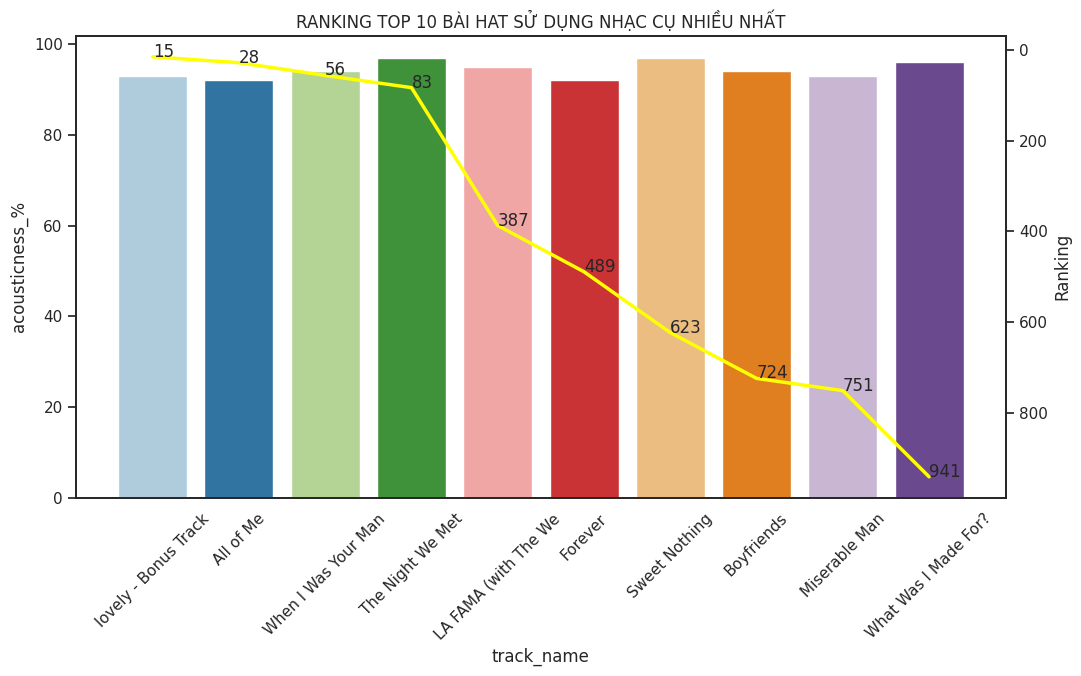

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", palette="Paired")

top_acoustic_stream["track_name"] = top_acoustic_stream["track_name"].str.slice(0, 20)
# line bar chart:
ax1 = sns.set_style(style=None)
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(
    data = top_acoustic_stream,
    x = "track_name", y = "acousticness_%", ax = ax1
)
plt.xticks(rotation=45)
ax2 = ax1.twinx()
ranking_lineplot = sns.lineplot(
    data = top_acoustic_stream,
    x = "track_name", y = "Ranking", ax = ax2,
    color="yellow", linewidth=2.5
)
ranking_lineplot.invert_yaxis() #Ranking from high to low

for row in top_acoustic_stream.itertuples():
    ranking_lineplot.annotate(text=row.Ranking, xy=(row.track_name, row.Ranking))

plt.title("RANKING TOP 10 BÀI HAT SỬ DỤNG NHẠC CỤ NHIỀU NHẤT")
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.show()

Nhịp bài hát ảnh hưởng như thế nào đến độ khiêu vũ của bài hát?

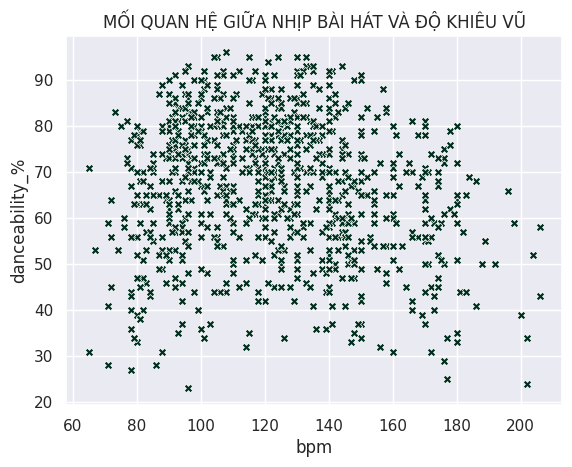

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_beatDance = df[["track_name", "bpm", "danceability_%"]]

sns.set_theme()
sns.scatterplot(
    data = df_beatDance,
    x = "bpm", y = "danceability_%",
    color='#023020', marker="X"
)

plt.title("MỐI QUAN HỆ GIỮA NHỊP BÀI HÁT VÀ ĐỘ KHIÊU VŨ")
plt.show()

Liệt kê các nghệ sĩ (artist) có các bài hát có bpm (beats per minute) nằm trong khoảng từ 190 đến 200

In [ ]:
filtered_song_bpm = df[(df["bpm"] >= 190) & (df["bpm"] <= 200)]

for track in filtered_song_bpm["track_name"]:
    print(track)

People
Un Finde | CROSSOVER #2
O.O
La Corriente


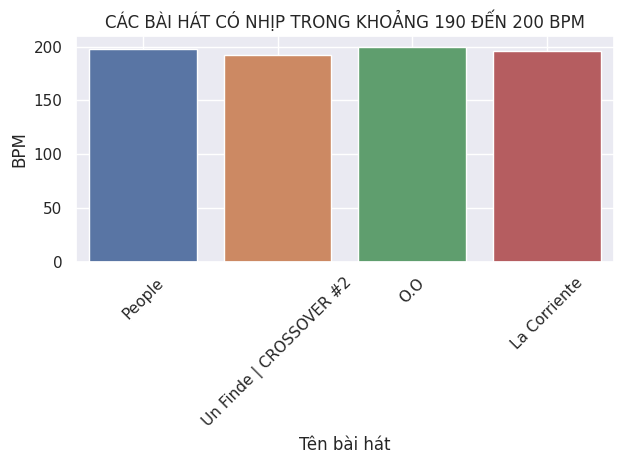

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.barplot(
    data = filtered_song_bpm,
    x = "track_name", y = "bpm"
)
plt.xlabel("Tên bài hát")
plt.ylabel("BPM")
plt.title("CÁC BÀI HÁT CÓ NHỊP TRONG KHOẢNG 190 ĐẾN 200 BPM")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Các bài hát remix có trong dữ liệu:

In [ ]:
df_remix = df_streams[df_streams["track_name"].str.contains("Remix", case = False)]
df_remix = df_remix[["Ranking", "track_name", "streams"]]
# df_remix.rename_axis("Ranking", inplace=True)
df_remix.reset_index(inplace=True)

df_remix

,index,Ranking,track_name,streams
0,63,63,Cold Heart - PNAU Remix,1605224506
1,112,112,Save Your Tears (with Ariana Grande) (Remix),1221813483
2,259,259,Volando - Remix,610045621
3,278,278,Mon Amour - Remix,578207856
4,287,287,La Bebe - Remix,553634067
5,291,291,Love Nwantiti - Remix,540539717
6,296,296,AM Remix,528544703
7,299,299,Die For You - Remix,518745108
8,407,407,Sad Girlz Luv Money Remix (feat. Kali Uchis),354065229
9,491,491,ULTRA SOLO REMIX,279717388


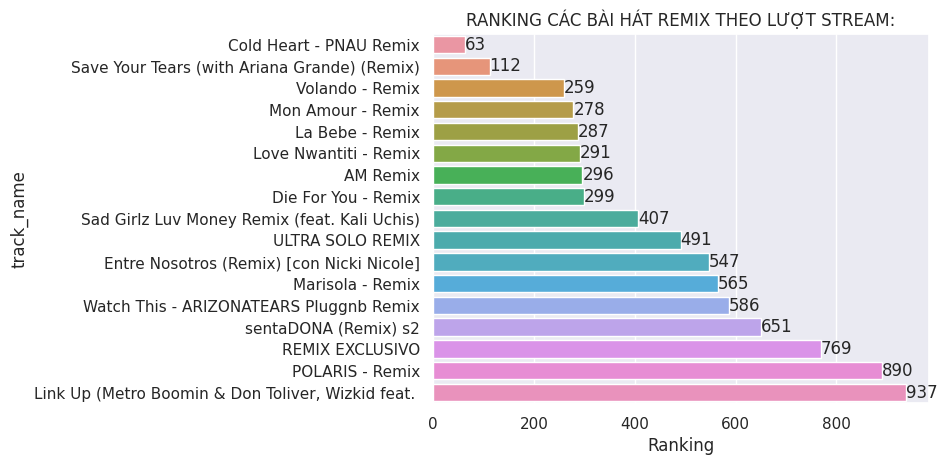

In [ ]:
# Draw a chart to show remix songs' rank:
import matplotlib.pyplot as plt
import seaborn as sns

#Shorten form of string in "track_name" column:
df_remix["track_name"] = df_remix["track_name"].str.slice(0, 50)

sns.set_theme()
ranking_stream_plot = sns.barplot(
    data = df_remix,
    x = "Ranking", y = "track_name"
)

for bars in ranking_stream_plot.containers:
    ranking_stream_plot.bar_label(bars)

plt.title("RANKING CÁC BÀI HÁT REMIX THEO LƯỢT STREAM:")
plt.show()

Liệt kê các bài hát có khả năng khiêu vũ trên 92%

In [ ]:
filtered_dance = df[df["danceability_%"] > 92]

filtered_dance

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,133,B,Minor,93,68,65,42,0,12,25
224,Players,Coi Leray,1,2022,11,30,4096,6,335074782,118,...,105,F#,Major,95,62,52,3,0,5,16
250,The Real Slim Shady,Eminem,1,2000,1,1,20763,27,1424589568,81,...,104,F,Minor,95,78,66,3,0,4,6
266,Shorty Party,"Cartel De Santa, La Kelly",2,2023,3,4,432,12,162887075,8,...,96,D,Major,93,47,47,33,0,10,36
268,Slut Me Out,NLE Choppa,1,2022,4,22,816,4,190490915,21,...,121,F#,Minor,94,71,61,12,0,53,42
321,CAIRO,"Karol G, Ovy On The Drums",2,2022,11,13,2418,26,294352144,52,...,115,F,Minor,95,43,69,47,0,9,31
423,Super Freaky Girl,Nicki Minaj,1,2022,8,12,4827,0,428685680,104,...,133,D,Major,95,91,89,6,0,31,24
595,Peru,"Ed Sheeran, Fireboy DML",2,2021,12,23,2999,0,261286503,60,...,108,G,Minor,96,71,42,57,0,8,9
669,Forgot About Dre,"Eminem, Dr. Dre",2,1999,1,1,19067,0,675039469,78,...,134,G#,Major,93,61,74,9,0,17,8
702,Starlight,Dave,1,2022,3,3,1856,3,229473310,29,...,124,G,Major,95,36,37,35,0,10,28


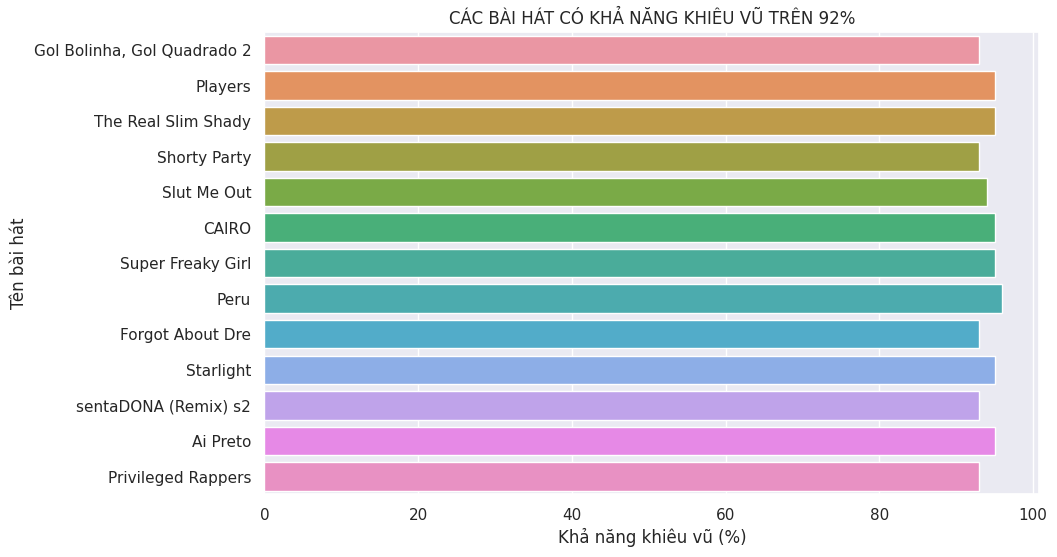

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter all songs having danceability_& > 92:
filtered_dance = df[df["danceability_%"] > 92]

# Drawing bargraph (horixontally):
sns.set_theme()
plt.figure(figsize=(10, 6))
sns.barplot(
    data = filtered_dance,
    x = "danceability_%", y = "track_name"
)
plt.ylabel("Tên bài hát")
plt.xlabel("Khả năng khiêu vũ (%)")
plt.title("CÁC BÀI HÁT CÓ KHẢ NĂNG KHIÊU VŨ TRÊN 92%")
plt.show()

Tỉ lệ bài hát có key là 'C#', mode là 'Major' và bài hát có key là 'C#', mode là 'Minor'

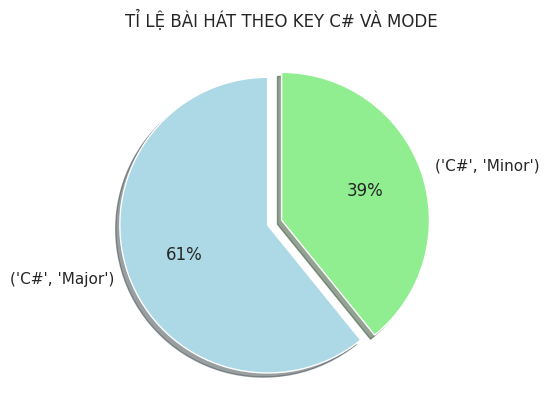

In [ ]:
filtered_key_node = df[(df["key"] == 'C#') & ((df["mode"] == 'Major') | (df["mode"] == 'Minor'))]
song_counts = filtered_key_node.groupby(["key", "mode"]).size()

# Drawing a pie-chart:
labels = song_counts.index
sizes = song_counts.values
colors = ["lightblue", "lightgreen"]
explode = [0 for i in range(len(song_counts))]
explode[0] = 0.1
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.0f%%', shadow=True,  startangle=90)
plt.title("TỈ LỆ BÀI HÁT CÓ KHÓA C# THEO MODE")
plt.show()

Liệt kê các bài hát không sử dụng nhạc cụ nhưng vẫn đạt thứ hạng cao trong BXH apple music (top 10)


In [ ]:
df_non_instrument = df[(df['instrumentalness_%'] == 0)]
df_non_instrument = df_non_instrument.sort_values("in_apple_charts", ascending=False)
df_non_instrument = df_non_instrument.head(10)
df_non_instrument

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
872,Last Last,Burna Boy,1,2022,5,12,4526,12,293466523,156,...,88,D#,Minor,80,55,56,13,0,8,9
888,Mary On A Cross,Ghost,1,2019,9,13,2668,2,387080183,38,...,130,B,Major,47,56,90,0,0,10,4
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,78,NaN,Major,44,14,9,96,0,10,3
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,496795686,91,...,120,B,Minor,78,76,59,43,0,34,3
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6


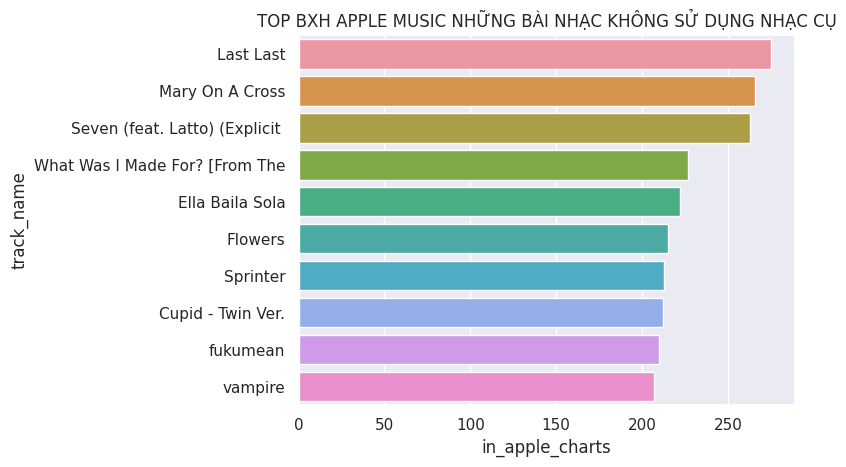

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_non_instrument["track_name"] = df_non_instrument["track_name"].str.slice(0, 30)

sns.set_theme(palette = "flare")

sns.barplot(
    data = df_non_instrument,
    x = "in_apple_charts", y = "track_name"
)

plt.title('TOP BXH APPLE MUSIC NHỮNG BÀI NHẠC KHÔNG SỬ DỤNG NHẠC CỤ')
plt.show()